# Практическая работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 0304 Голиков Анатолий, Решоткин Артём и Крицын Данила. Вариант №5.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

Свойства любого фильтра однозначно определяют его частотная и фазовая характеристики. Они показывают, какое влияние фильтр оказывает на амплитуду и фазу различных гармоник обрабатываемого сигнала. Квадратурные формулы прямоугольников, трапеций, Симпсона и интегрирования «по правилу 3/8» для численного интегрирования можно рассматривать, как некоторый рекурсивный фильтр.
* Формула прямоугольников:
$$y_{n+1} = y_n + s_{n + {\frac{1}{2}}}, y_0 = 0$$
* Формула трапеций:
$$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1}+4s_n+s_{n+1}), y_0 = 0$$
* Формула Симпсона:
$$y_{n+1}=y_n+\frac{1}{2}(s_n + s_{n+1}), y_0 = 0$$
* Формула интегрирования «по правилу 3/8»:
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1})$$

## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\hat{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

#### 1. Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Формулы для передаточных функции рекурсивных фильтров:
* Формула прямоугольников:
$$\tilde{H}(f) = \frac{1}{2i sin(\pi f)}$$
* Формула трапеций:
$$\tilde{H}(f) = \frac{cos(\pi f)}{2i sin(\pi f)}$$
* Формула Симпсона:
$$\tilde{H}(f) = \frac{cos(2\pi f) + 2}{3i sin(2\pi f)}$$

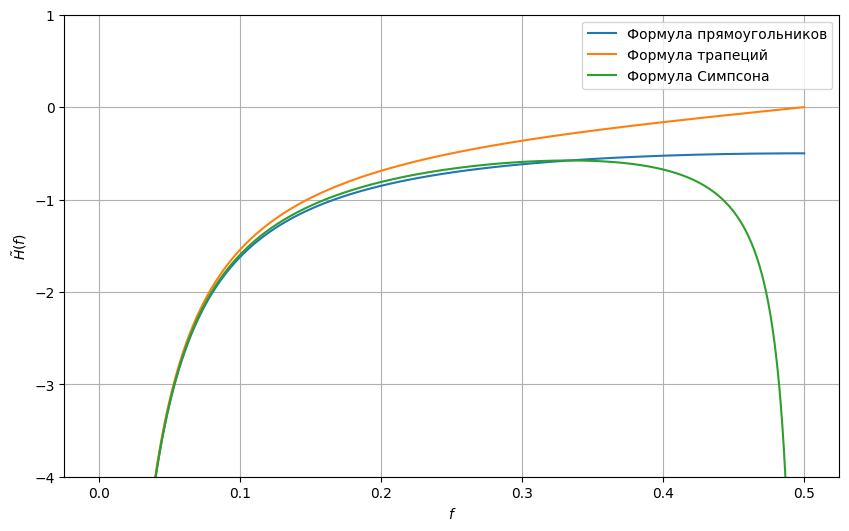

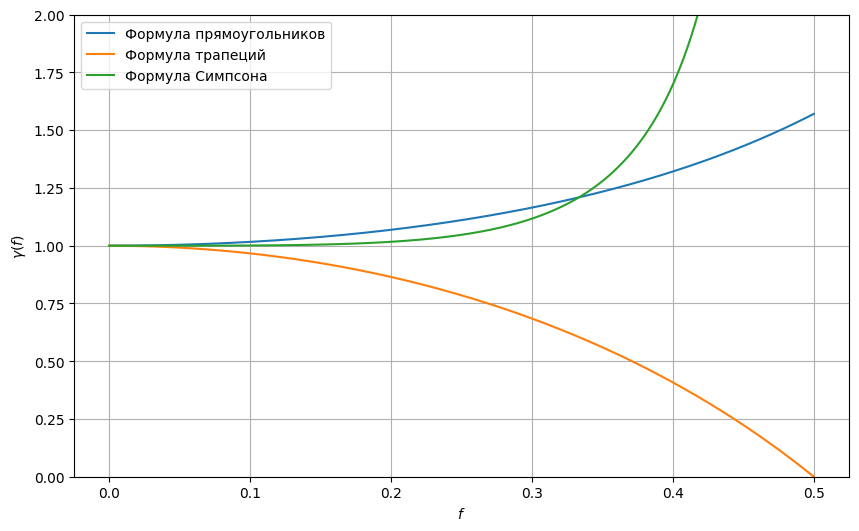

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt

def h_rect(f):
 return (1 / (2j*math.sin(math.pi*f))).imag
def h_trapezoid(f):
 return (math.cos(math.pi*f) / (2j*math.sin(math.pi*f))).imag
def h_simpson(f):
 return ((math.cos(2*math.pi*f)+2) / (3j*math.sin(2*math.pi*f))).imag

def k_rect(f):
 return math.pi*f / (math.sin(math.pi*f))
def k_trapezoid(f):
 return math.cos(math.pi*f) * (math.pi*f/math.sin(f*math.pi))
def k_simpson(f):
 return ((math.cos(2*math.pi*f) + 2) / 3) * ((2*math.pi*f)/(math.sin(2*math.pi*f)))
    
xspace = np.linspace(0.0001, 0.5, 1000)

plt.figure(figsize=(10, 6))
plt.plot(f_values, [h_rect(f) for f in xspace], label="Формула прямоугольников")
plt.plot(f_values, [h_trapezoid(f) for f in xspace], label="Формула трапеций")
plt.plot(f_values, [h_simpson(f) for f in xspace], label="Формула Симпсона")
plt.ylim((-4, 1))
plt.ylabel(r"$\tilde{H}(f)$")
plt.xlabel(r"$f$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(f_values, [k_rect(f) for f in xspace], label="Формула прямоугольников")
plt.plot(f_values, [k_trapezoid(f) for f in xspace], label="Формула трапеций")
plt.plot(f_values, [k_simpson(f) for f in xspace], label="Формула Симпсона")
plt.ylim((0, 2))
plt.ylabel(r"$\gamma(f)$")
plt.xlabel(r"$f$")
plt.legend()
plt.grid()
plt.show()

Из графиков можно сделать вывод, что формула трапеций, которая выступает в роли рекурсивного фильтра, подавляет высокие частоты, а квадратурные формулы прямоугольников и Симпсона усиливают высокие частоты.

#### 2. Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:
#### $ y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1}) $
#### Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

Выведем формула для передаточной функции по правилу интегрирования 3/8:
$$y_{n+2}=y_{n-1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_n+x_{n-1})$$
$$\begin{cases} y_{n+2} = H(\omega)e^{i\omega (n-1)} + \frac{e^{i\omega (n+2)} + 3e^{i\omega (n+1)} + 3e^{i\omega n} + e^{i\omega (n-1)} }{8} \\ y_{n+2} = H(\omega)e^{i\omega (n+2)} \end{cases}$$
$$H(\omega)(e^{i\omega n}e^{2i\omega}) = H(\omega)e^{i\omega n}e^{-i\omega} + e^{i\omega n}\frac{e^{2i\omega}+3e^{i\omega}+3+e^{-i\omega}}{8}$$
$$H(\omega)=\frac{e^{2i\omega}+3e^{i\omega}+e+e^{-i\omega}}{8(e^{2i\omega}-e^{-i\omega}))} \cdot \frac{e^{-\frac{i\omega}{2}}}{e^{-\frac{i\omega}{2}}}$$
$$H(\omega)=\frac{e^{\frac{3i\omega}{2}} + 3e^{\frac{i\omega}{2}} + 3e^{-\frac{i\omega}{2}} + e^{-\frac{3i\omega}{2}}}{8(e^{\frac{3i\omega}{2}} - e^{-\frac{3i\omega}{2}})}=\frac{2cos(\frac{3\omega}{2}) + 6cos(\frac{\omega}{2})}{16isin(\frac{3\omega}{2})}$$
$$\tilde{H}(f) = \frac{cos(3\pi f) + 3cos(\pi f)}{8i sin(3\pi f)}$$

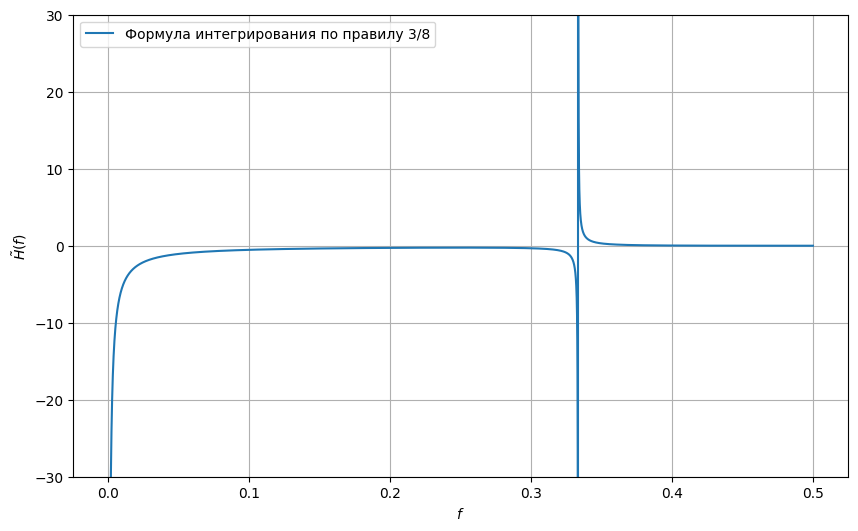

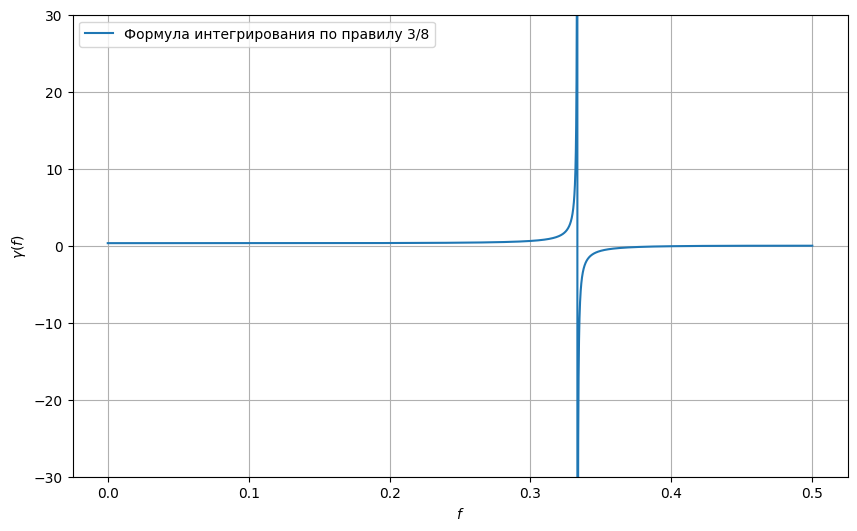

In [32]:
def h_3_8(f):
 return ((np.cos(3*math.pi*f)+3*np.cos(math.pi*f))/(8j*np.sin(3*math.pi*f))).imag
def k_3_8(f):
 return (1/12)*(np.cos(3*math.pi*f)+3*np.cos(math.pi*f))*((3*math.pi*f)/np.sin(3*math.pi*f))
    
xspace = np.linspace(0.0001, 0.5, 1000)
plt.figure(figsize=(10, 6))
plt.plot(f_values, [h_3_8(f) for f in f_values], label="Формула интегрирования по правилу 3/8")
plt.ylim((-30, 30))
plt.ylabel(r"$\tilde{H}(f)$")
plt.xlabel(r"$f$")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(f_values, [k_3_8(f) for f in f_values], label="Формула интегрирования по правилу 3/8")
plt.ylim((-30, 30))
plt.ylabel(r"$\gamma(f)$")
plt.xlabel(r"$f$")
plt.legend()
plt.grid()
plt.show()

#### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Для проведения сопоставительного анализа частотных характеристик воспользуемся графиками, представленными выше. По графикам на первом и третьем рисунке можно увидеть следующую зависимость: рекурсивный фильтр, для которого используется квадратурная формула трапеций, подавляет высокие частоты. Обратная ситуация происходит с рекурсивными фильтрами, для которых используются квадратурные формулы прямоугольников и Симпсона. При их использовании происходит усиление высоких частот.

## Выводы

В ходе выполнения практической работы был проведен анализ частотных свойств известных методов численного интегрирования. Были разработаны и выведены формулы для передаточных функций рекурсивных фильтров, которые соответствуют методам интегрирования по формулам прямоугольников, трапеций, Симпсона и правила 3/8. Были созданы графики, отображающие как передаточные функции этих фильтров, так и соотношение между результатами фильтрации и истинными значениями. Используя эти графики, были изучены частотные характеристики передаточных функций и выполнен сравнительный анализ их частотных свойств.